In [67]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import auc, roc_curve, precision_recall_curve
from scipy.optimize import lsq_linear

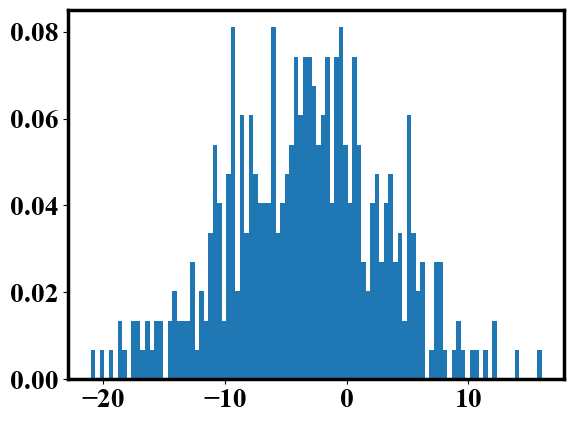

'\nkk=[i for i in range(4,100)]\nx=[(20/(k-2))-(4/((k-1)*(k-2))) for k in kk] \nplt.plot(kk,x)   \nplt.xlabel("k")\n'

In [123]:
####### generating simulation data for Scenario 2 in the paper
####### section 1

p_i = [0.8, 0.2]  # set probability of belonging to class 1 as 0.8.
n = 400  # set number of samples in the simulation

#set mean 0 and mean 1 for latent models
mu1 = [-5,1.25]  #12.5  mu0=-0.48
mu2= [-1,0.25]  #15      mu0=0.49
mu3=[-5.2,1.3]    #5       mu0=-0.39
mu4=[-1.04,0.26]
# set standard deviation for latentmodels
sigma1 =[6,6]
sigma2 = [6,6]
sigma3 = [3, 3]
sigma4=[3,3]

alpha1=[]
alpha2=[]
alpha3=[]
alpha4=[]
yy=[]
for i in range(n):
    z_i = np.argmax(np.random.multinomial(1, p_i))
    yy.append(z_i)
    aa=np.random.normal(mu1[z_i], sigma1[z_i])
    bb=np.random.normal(mu2[z_i], sigma2[z_i])
    cc=np.random.normal(mu3[z_i], sigma3[z_i])
    dd=np.random.normal(mu4[z_i], sigma4[z_i])
    alpha1.append(aa)
    alpha2.append(bb)
    alpha3.append(cc)
    alpha4.append(dd)

one=np.where(np.array(yy)==0)
alpha1_1=np.array(alpha1)[one]
alpha2_1=np.array(alpha2)[one]
alpha3_1=np.array(alpha3)[one]
alpha4_1=np.array(alpha4)[one]
plt.hist(alpha1, bins=100,density=True)
plt.show()
########################################### b values
#b_alpha1=np.random.normal(3.5,1.5,6)
b_alpha1=0.5*np.array([0.121,0.13,0.10,0.09,0.11,0.10,0.17,0.15,0.16])
#b_alpha2=np.random.normal(7,1.5,5)
b_alpha2=np.array([0.17,0.18,0.19,0.20,0.15,0.16])
#b_alpha3=np.random.normal(0,1.5,2)
b_alpha3=0.5*np.array([0.23,0.245,0.24,0.23,0.22,0.31,0.30])

b_alpha4=np.array([0.23,0.245,0.24,0.23,0.20])

####################################### X values
epsilon=np.random.normal(0,0.3,400)
x1=[]
x1_std=[]
alp1=[]
for i in range (0,9):
    a=(b_alpha1[i]*np.array(alpha1))+np.random.normal(0,0.6,400)
    b=(a-np.mean(a))/(np.std(a))
    x1_std.append(np.std(a))
    x1.append(b)
    alp1.append(b[one])
x2=[]
x2_std=[]
alp2=[]
for i in range (0,6):
    a=(b_alpha2[i]*np.array(alpha2))+np.random.normal(0,0.6,400)
    b=(a-np.mean(a))/(np.std(a))
    x2_std.append(np.std(a))
    x2.append(b)
    alp2.append(b[one])
x3=[]
x3_std=[]
alp3=[]
for i in range (0,7):
    a=(b_alpha3[i]*np.array(alpha3))+np.random.normal(0,0.6,400)
    b=(a-np.mean(a))/(np.std(a))
    x3_std.append(np.std(a))
    x3.append(b) 
    alp3.append(b[one])

x4=[]
x4_std=[]
alp4=[]
for i in range (0,5):
    a=(b_alpha4[i]*np.array(alpha4))+np.random.normal(0,0.6,400)
    b=(a-np.mean(a))/(np.std(a))
    x4_std.append(np.std(a))
    x4.append(b) 
    alp4.append(b[one])
x=np.concatenate([x1,x2,x3,x4])

true_acc1=(b_alpha1*6.25)/(((b_alpha1*6)**2)+0.36)
true_acc2=(b_alpha2*1.25)/(((b_alpha2*6)**2)+0.36)
true_acc3=(b_alpha3*6.5)/(((b_alpha3*3)**2)+0.36)
true_acc4=(b_alpha4*1.3)/(((b_alpha4*3)**2)+0.36)
"""
true_acc1=b_alpha1*np.mean(alp1)
true_acc2=b_alpha2*np.mean(alp2)
true_acc3=b_alpha3*np.mean(alp3)
true_acc4=b_alpha4*np.mean(alp4)
"""   

'''
kk=[i for i in range(4,100)]
x=[(20/(k-2))-(4/((k-1)*(k-2))) for k in kk] 
plt.plot(kk,x)   
plt.xlabel("k")
'''

   


[0 0 0 0 0 0 0 0 0 3 3 3 3 3 3 2 2 2 2 2 2 2 1 1 1 1 1]


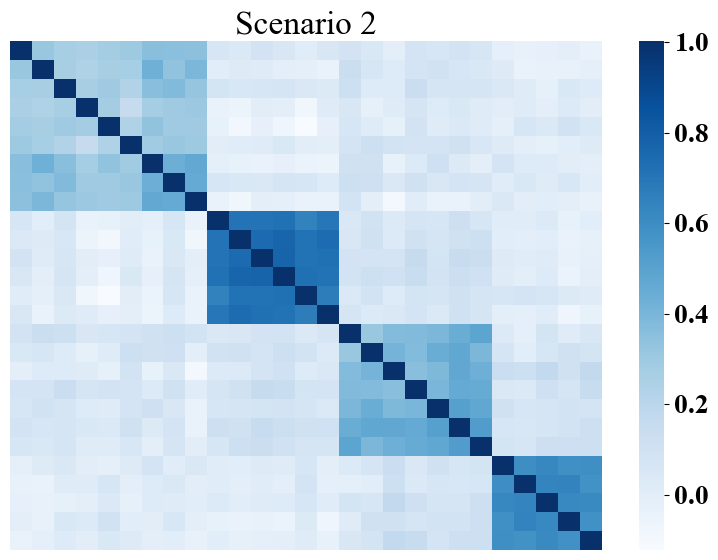

In [134]:
######## section 2
asa=np.cov(x) 
import seaborn as sb 
plt.figure(figsize=(8, 6))  
sb.heatmap(asa,cmap="Blues") 
plt.xticks([]) 
plt.yticks([]) 
plt.title("Scenario 2")
plt.tight_layout()
from sklearn.cluster import AgglomerativeClustering
clustering=AgglomerativeClustering(n_clusters=4).fit(asa)
print(clustering.labels_) 
plt.savefig('4latent_1_quartet.tiff', format='tiff', dpi=600, bbox_inches='tight')

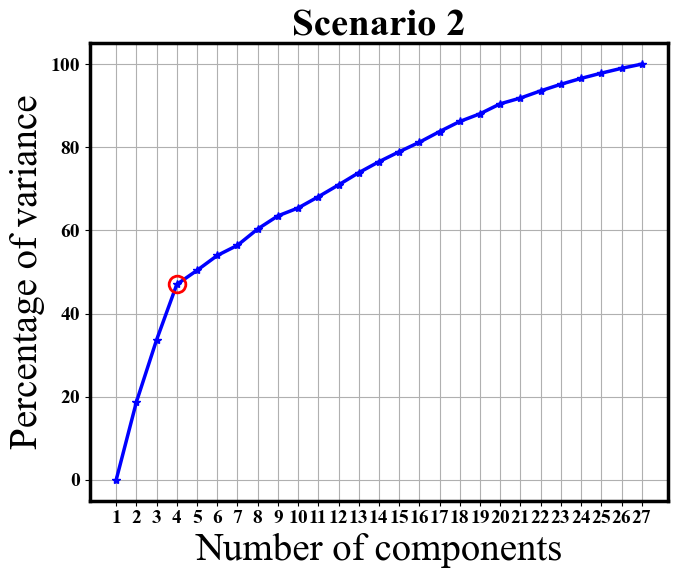

In [157]:
######## section 3
######## elbow method

new_score=x
K = range(1, 28)
KM = [KMeans(n_clusters=k, random_state=42).fit(new_score) for k in K]
centroids = [k.cluster_centers_ for k in KM]

D_k = [cdist(new_score, cent, 'euclidean') for cent in centroids]
cIdx = [np.argmin(D, axis=1) for D in D_k]
dist = [np.min(D, axis=1) for D in D_k]
avgWithinSS = [sum(d) / new_score.shape[0] for d in dist]

# Total within-cluster sum of squares
wcss = [sum(d**2) for d in dist]
tss = sum(pdist(new_score)**2) / new_score.shape[0]
bss = tss - wcss

kIdx = 3

# Elbow curve
fig, ax = plt.subplots(figsize=(7, 6))
font = {'family': 'Times New Roman', 'size': 14}

plt.rc('font', **font)
plt.rc('lines', linewidth=2.5)
plt.rcParams['axes.linewidth'] = 2.5
plt.rc('hatch', color='k', linewidth=2.5)


ax.plot(K, np.array(bss) / tss * 100, 'b*-')
ax.plot(K[kIdx], (np.array(bss) / tss * 100)[kIdx], marker='o', markersize=12,
        markeredgewidth=2, markeredgecolor='r', markerfacecolor='None')
plt.grid(True)
plt.xlabel('Number of components', fontsize=28)
plt.ylabel('Percentage of variance', fontsize=28)
plt.xticks(np.arange(1, 28))
plt.title('Scenario 2', fontweight='bold', fontsize=28)
plt.tight_layout()
fig.savefig('4latent_varaince.tiff', format='tiff', dpi=600, bbox_inches='tight')
###############################################


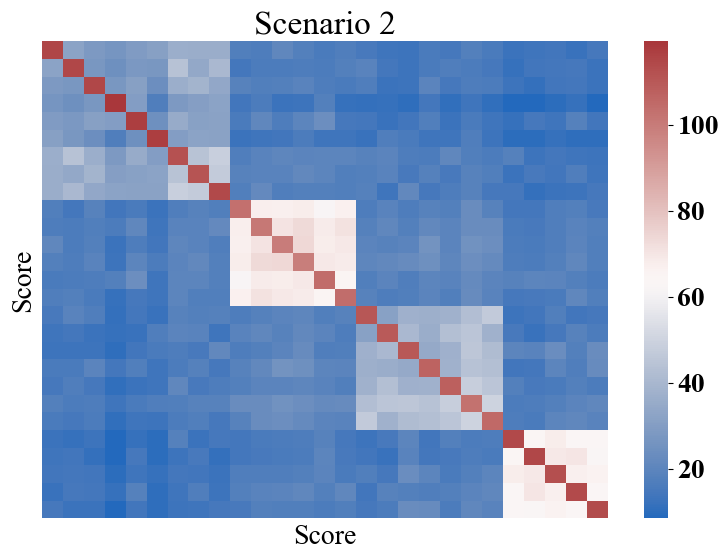

In [133]:
####### section 4
####### quartet-based similarity matrix
s=np.zeros([27,27])
for i in range (0,27):
    for j in range (0,27):
        for k in range(0,27):
           for l in range(0,27): 
            if k!=i and k!=j and l!=i and l!=j:
              b=np.abs((asa[i][j]*asa[k][l])-(asa[i][l]*asa[k][j]))
              s[i][j]=s[i][j]+b
plt.figure(figsize=(8, 6))                 
sb.heatmap(s,cmap="vlag") 
plt.xticks([]) 
plt.yticks([]) 
plt.xlabel("Score")
plt.ylabel("Score")
plt.title("Scenario 2")
plt.tight_layout()
from sklearn.cluster import AgglomerativeClustering
clustering=AgglomerativeClustering(n_clusters=4).fit(asa)
#print(clustering.labels_) 
plt.savefig('4latent_quartet.tiff', format='tiff', dpi=600, bbox_inches='tight')

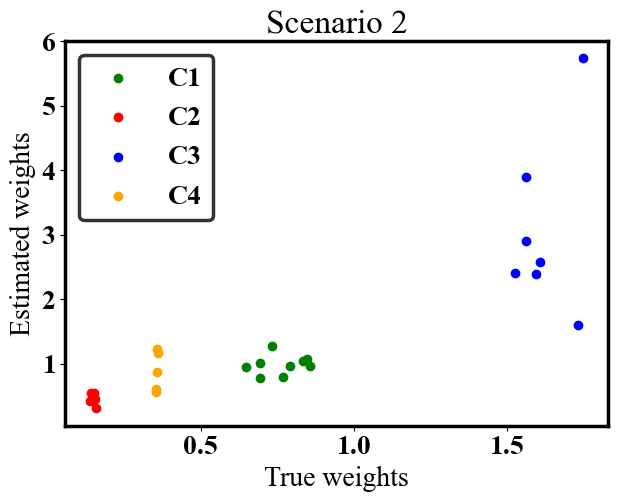

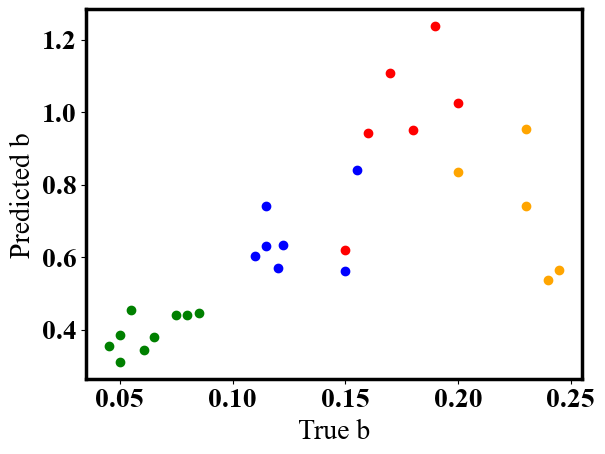

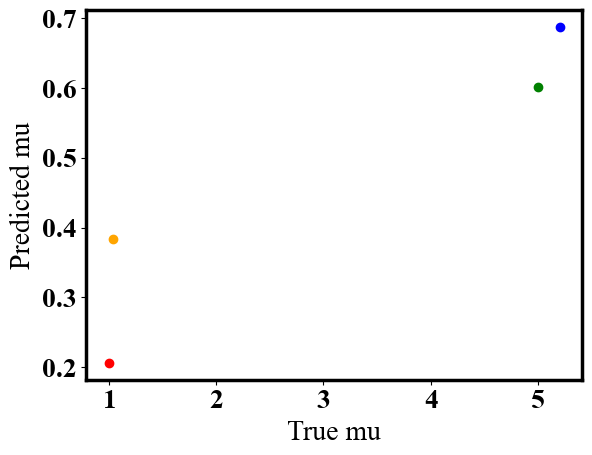

ROC-AUC: 0.9272804675103526
PRC-AUC: 0.8452696688591526


In [108]:
############### section 5
############### SUEL.CQO
asa=np.cov(x)
c=[[0,1,2,3,4,5,6,7,8],[9,10,11,12,13,14],[15,16,17,18,19,20,21],[22,23,24,25,26]]
A=np.zeros([351,36]) #m(m-1)/2, m+2k+1
B=np.zeros([351,36])
z=np.zeros(351)
from itertools import combinations
########### diagonal blocks equations
hh=[i for i in range(0,36)]#np.load('linear_system_parameters.npy')
#np.save('linear_system_parameters',res.x[0:31])
n=0
for k in range (0,4): #35 equations
  a = list(combinations(c[k], 2))
  for i in range (0,len(a)):
      A[n][a[i][0]]=1
      A[n][a[i][1]]=1
      A[n][26+k]=1
      z[n]=np.log(np.abs(asa[a[i][0]][a[i][1]]))
      B[n][a[i][0]]=hh[a[i][0]]
      B[n][a[i][1]]=hh[a[i][1]]
      B[n][26+k]=hh[26+k]
      n=n+1
from itertools import product
for i in range(0,4):
    for j in range(i,4):
        if j != i:
          l1, l2 = c[i],c[j]
          a = list(product(l1, l2))
          for k in range (0,len(a)):
            A[n][a[k][0]]=1
            A[n][a[k][1]]=1
            A[n][31+i]=1
            A[n][31+j]=1
            A[n][35]=1
            z[n]=np.log(np.abs(asa[a[k][0]][a[k][1]]))
            B[n][a[k][0]]=hh[a[k][0]]
            B[n][a[k][1]]=hh[a[k][1]]
            B[n][31+i]=hh[31+i]
            B[n][31+j]=hh[31+j]
            B[n][35]=hh[35]
            n=n+1




sum_b=np.sum(B,axis=1)
#plt.hist(sum_b-z,bins=100)
#plt.xlabel("Residual")
#plt.ylabel("Frequency")
r2=1-(sum((sum_b-z)**2)/(sum((z-np.mean(z))**2)))
#adj_r2=1-((((1-r2)*30))/(190-30))
#
#plt.plot(sum_b)
#plt.plot(z)
#plt.scatter(np.exp(sum_b),np.exp(z))
from sklearn.metrics import r2_score 
r2_score(z,sum_b)

############################################constrained_linear_system of equation

from scipy.optimize import lsq_linear
cccc=lsq_linear(A,z,bounds=(- np.inf,0))
hh=cccc.x

fff1=np.exp(cccc.x[-1])-(((np.exp(cccc.x[0:9])**2))*(1-np.exp(cccc.x[-1]))*(np.exp(cccc.x[31])**2))
fff2=np.exp(cccc.x[-1])-(((np.exp(cccc.x[9:15])**2))*(1-np.exp(cccc.x[-1]))*(np.exp(cccc.x[32])**2))
fff3=np.exp(cccc.x[-1])-(((np.exp(cccc.x[15:22])**2))*(1-np.exp(cccc.x[-1]))*(np.exp(cccc.x[33])**2))
fff4=np.exp(cccc.x[-1])-(((np.exp(cccc.x[22:27])**2))*(1-np.exp(cccc.x[-1]))*(np.exp(cccc.x[34])**2))

acc11=-(np.exp(cccc.x[0:9])*np.exp(cccc.x[31]))/fff1
acc12=-(np.exp(cccc.x[9:15])*np.exp(cccc.x[32]))/fff2
acc13=-(np.exp(cccc.x[15:22])*np.exp(cccc.x[33]))/fff3
acc14=-(np.exp(cccc.x[22:27])*np.exp(cccc.x[34]))/fff4

fig, ax = plt.subplots(figsize=(7,5))
font = {'family' : 'Times New Roman',
        'size'   : 22}

plt.scatter((true_acc1),abs(acc11), color='green')
plt.scatter(true_acc2,abs(acc12), color='red')
plt.scatter(true_acc3, abs(acc13), color='blue')
plt.scatter(true_acc4, abs(acc14), color='orange')


plt.xlabel('True weights')
plt.ylabel('Estimated weights')
plt.title("Scenario 2")
leg=plt.legend(["C1", "C2","C3" ,"C4"], loc ="upper left")
leg.get_frame().set_edgecolor('k')
leg.get_frame().set_linewidth(2.5)
plt.show()
#######################################################

plt.scatter(b_alpha1,np.exp(cccc.x[0:9])*np.array(x1_std), color='green')
plt.scatter(b_alpha2,np.exp(cccc.x[9:15])*np.array(x2_std), color='red')
plt.scatter(b_alpha3,np.exp(cccc.x[15:22])*np.array(x3_std), color='blue')
plt.scatter(b_alpha4,np.exp(cccc.x[22:27])*np.array(x4_std), color='orange')
plt.xlabel('True b')
plt.ylabel('Predicted b')
plt.show()
#########################################################
plt.scatter(5,np.exp(cccc.x[31]) , color='green')
plt.scatter(1,np.exp(cccc.x[32]), color='red')
plt.scatter(5.2,np.exp(cccc.x[33]), color='blue')
plt.scatter(1.04,np.exp(cccc.x[34]), color='orange')
plt.xlabel('True mu')
plt.ylabel('Predicted mu')
plt.show()
###########################################################

acc1=abs(np.concatenate([acc11,acc12,acc13,acc14]))
#acc=abs(np.concatenate([true_acc1,true_acc2,true_acc3,true_acc4]))
ensi=[]
for i in range(0,len(acc1)):   
        a=np.array(x[i]).T*abs(acc1[i])
        ensi.append(a)
suel_cqo=np.mean(ensi,axis=0) 

fpr1, tpr1, threshold1=metrics.roc_curve(np.array(yy),np.array(suel_cqo),pos_label=1)
print("ROC-AUC:",auc(fpr1,tpr1))
fpr2,tpr2,threshold2=metrics.precision_recall_curve(np.array(yy),np.array(suel_cqo),pos_label=1)
print("PRC-AUC:",auc(tpr2,fpr2))
 


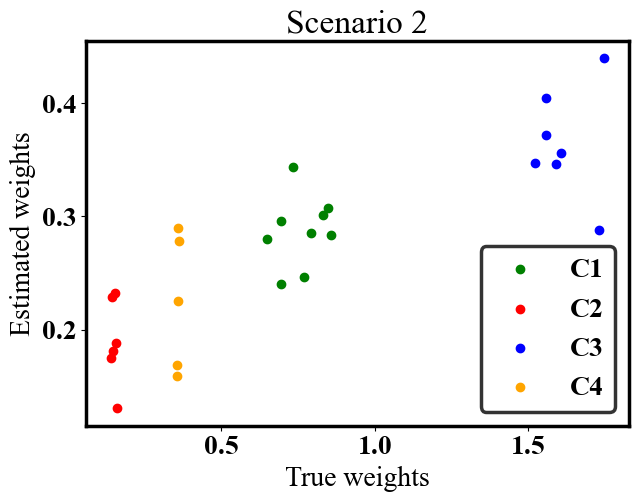

ROC-AUC: 0.9055303997832733
PRC-AUC: 0.7951680308548662


In [110]:
############## section 6
############## Eigen
asa=np.cov(x)
c=[[i] for i in range(0,27)]
A=np.zeros([351,27]) #m(m-1)/2, m
B=np.zeros([351,27])
z=np.zeros(351)
n=0
hh=[i for i in range(0,27)]#res.x
for i in range(0,27):
    for j in range(i,27):
        if j != i:
          l1, l2 = c[i],c[j]
          a = list(product(l1, l2))
          for h in range (0,len(a)):
            A[n][a[h][0]]=1
            A[n][a[h][1]]=1
            z[n]=np.log(np.abs(asa[a[h][0]][a[h][1]]))
            B[n][a[h][0]]=hh[a[h][0]]
            B[n][a[h][1]]=hh[a[h][1]]
            n=n+1  
            

res2=lsq_linear(A,z)            

fig, ax = plt.subplots(figsize=(7,5))
font = {'family' : 'Times New Roman',
        'size'   : 22}

plt.scatter(abs(true_acc1), np.exp(res2.x[0:9]) , color='green')
plt.scatter(abs(true_acc2),np.exp(res2.x[9:15]), color='red')
plt.scatter(abs(true_acc3), np.exp(res2.x[15:22]), color='blue')
plt.scatter(abs(true_acc4), np.exp(res2.x[22:27]), color='orange')


plt.xlabel('True weights')
plt.ylabel('Estimated weights')
plt.title("Scenario 2")
leg=plt.legend(["C1", "C2","C3" ,"C4"], loc ="lower right")
leg.get_frame().set_edgecolor('k')
leg.get_frame().set_linewidth(2.5) 
plt.show()


std=np.concatenate([x1_std,x2_std,x3_std])
ensi=[]
for i in np.concatenate(c):  
        a=np.array(x[i]).T*np.exp(res2.x[i])
        ensi.append(a)
        
eigen_pc=np.sum(ensi,axis=0)
fpr1, tpr1, threshold1=metrics.roc_curve(np.array(yy),eigen_pc,pos_label=1)
print("ROC-AUC:",auc(fpr1,tpr1))
fpr2,tpr2,threshold2=metrics.precision_recall_curve(np.array(yy),eigen_pc,pos_label=1)
print("PRC-AUC:",auc(tpr2,fpr2))





In [111]:
################## section 7
################# Average of scores
 a=np.sum(np.array(x1).T*np.array(x1_std),axis=1)
b=np.sum(np.array(x2).T*np.array(x2_std),axis=1)
c=np.sum(np.array(x3).T*np.array(x3_std),axis=1)
d=np.sum(np.array(x4).T*np.array(x4_std),axis=1)
average=np.mean([a,b,c,d],axis=0)
fpr1, tpr1, threshold1=metrics.roc_curve(np.array(yy),average,pos_label=1)
print("ROC-AUC:",auc(fpr1,tpr1))
fpr2,tpr2,threshold2=metrics.precision_recall_curve(np.array(yy),average,pos_label=1)
print("PRC-AUC:",auc(tpr2,fpr2))

ROC-AUC: 0.8400479894732769
PRC-AUC: 0.6352891377497168


In [142]:
################## section 8
###### Best of predictors
all_score=np.concatenate([np.array(x1),np.array(x2),np.array(x3),np.array(x4)])
roc=[]
for i in range(0,len(all_score)):
    fpr1, tpr1, threshold1=metrics.roc_curve(np.array(yy),all_score[i],pos_label=1)
    roc.append(auc(fpr1,tpr1))

best_score=all_score[np.argmax(np.array(roc))]
fpr1, tpr1, threshold1=metrics.roc_curve(np.array(yy),best_score,pos_label=1)
print("ROC-AUC:",auc(fpr1,tpr1))
fpr2,tpr2,threshold2=metrics.precision_recall_curve(np.array(yy),best_score,pos_label=1)
print("PRC-AUC:",auc(tpr2,fpr2))

ROC-AUC: 0.8596078431372549
PRC-AUC: 0.6724536582153273


/var/folders/63/r5m31vp516x6qwddwfqtw5xh0000gr/T/ipykernel_56197/1563585248.py:34: ComplexWarning: Casting complex values to real discards the imaginary part
  B[j][i]=np.sum(U[:,i]*np.array(RR[i][j,:]))/(np.sum(U[:,i]*U[:,i]))


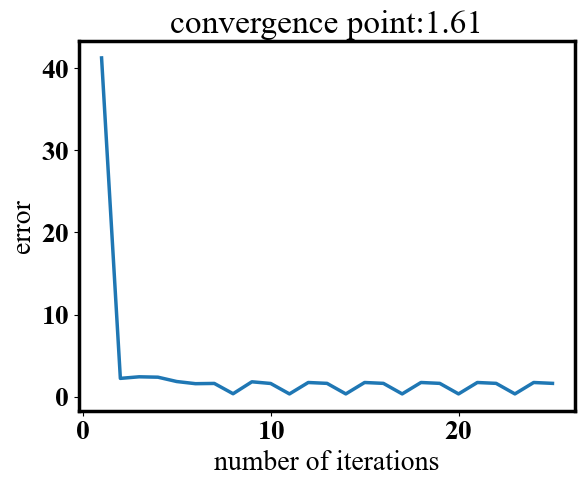

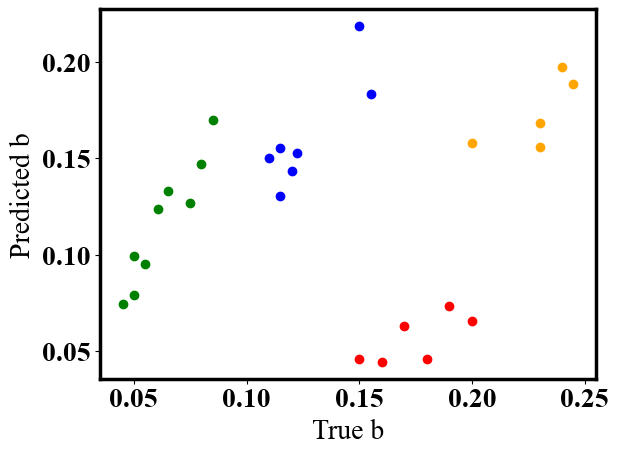

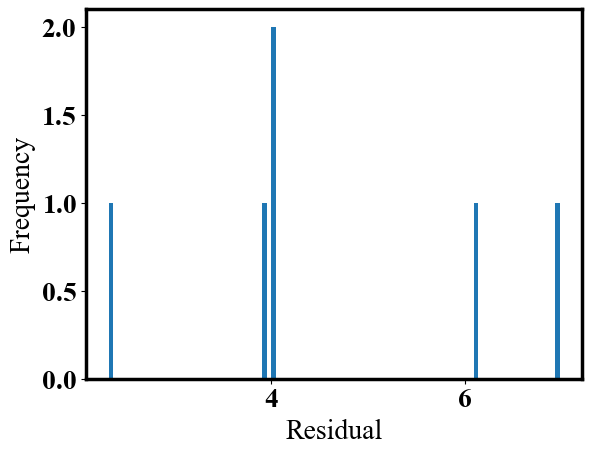

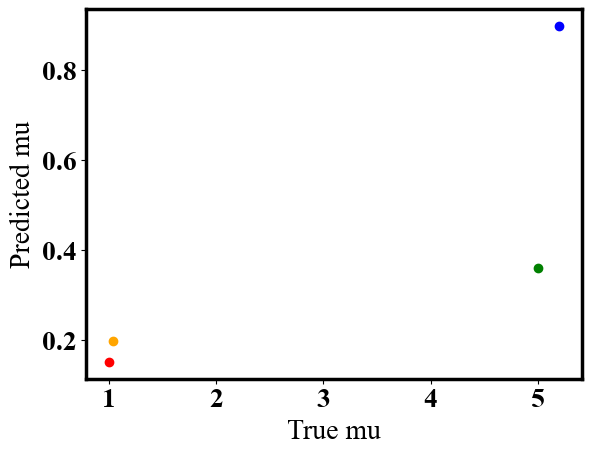

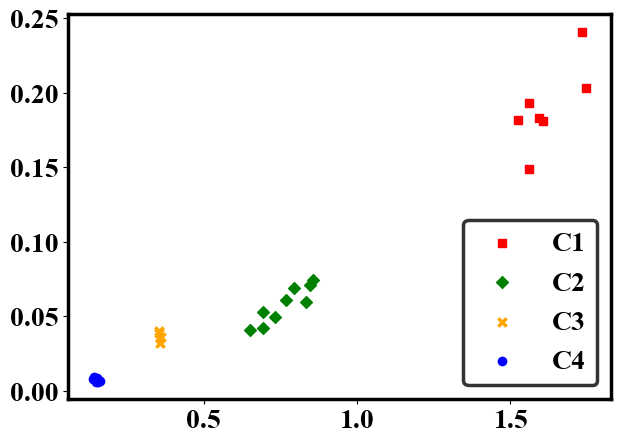

ROC-AUC: 0.9341692789968652
PRC-AUC: 0.8488487409828704


In [117]:
######### section 9
######## SUEL.MF

cc=[[0,1,2,3,4,5,6,7,8],[9,10,11,12,13,14],[15,16,17,18,19,20,21],[22,23,24,25,26]]
R=np.cov(x)
from scipy import linalg
d,w=linalg.eig(R)
index=np.argsort(-d)
W=w[:,index[0:4]]
################# computing B
B=np.zeros((27,4))
bb=np.random.rand(27,4)
U=np.zeros((4,4))
uu=np.random.rand(4,4)
U=U+uu
B=B+bb
RR=[]
ep1=[]  
diag_A=np.zeros((len(R),len(R))) 
for ii in range(0,100):
    d,w=linalg.eig(R-diag_A)
    index=np.argsort(-d)
    W=w[:,index[0:4]]
    RR=[]
    for i in range(0,4):
        c=-np.matmul(np.matrix(B[:,i]).T,np.matrix(U[:,i]))
        for f in range (0,4):
            c=np.matmul(np.matrix(B[:,f]).T,np.matrix(U[:,f]))+c
        RR.append(W-c)
    for i in range(0,4):   
        for j in range (0,27):
            if j in cc[i]: 
                B[j][i]=np.sum(U[:,i]*np.array(RR[i][j,:]))/(np.sum(U[:,i]*U[:,i]))
            else:
                B[j][i]=0            
################## computing U
    S=np.matmul(B.T,W) 
    uu,ss,vvh=np.linalg.svd(S)
    U=np.matmul(uu,vvh) 
    asar=np.matmul(U,np.matmul(np.diag(d[index[0:4]]),U.T))
    diag_A=np.diag(np.diag(R-np.matmul(B,np.matmul(asar,B.T))))
    epsilon=abs(np.sum((W-np.matmul(B,U))*(W-np.matmul(B,U))))
    ep1.append(epsilon)    
plt.plot(np.arange(1,26),ep1[0:25])
plt.xlabel("number of iterations")
plt.ylabel("error")
plt.title("convergence point:{}".format(np.round(ep1[-1],2)))
plt.show()
##################
###########################################
plt.scatter(b_alpha1,abs(B[0:9,0]*np.array(x1_std)), color='green')
plt.scatter(b_alpha2,abs(B[9:15,1]*np.array(x2_std)), color='red')
plt.scatter(b_alpha3,abs(B[15:22,2]*np.array(x3_std)), color='blue')
plt.scatter(b_alpha4,abs(B[22:27,3]*np.array(x4_std)), color='orange')
plt.xlabel('True b')
plt.ylabel('Predicted b')
plt.show()
################################ computing mu0
asa=np.matmul(U,np.matmul(np.diag(d[index[0:4]]),U.T))
c=[[i] for i in range(0,4)]
A=np.zeros([6,4]) #m(m-1)/2, m
BB=np.zeros([6,4])
z=np.zeros(6)
n=0
hh=[i for i in range(0,6)]#res.x
for i in range(0,4):
    for j in range(i,4):
        if j != i:
          l1, l2 = c[i],c[j]
          a = list(product(l1, l2))
          for h in range (0,len(a)):
            A[n][a[h][0]]=1
            A[n][a[h][1]]=1
            z[n]=np.log(np.abs(asa[a[h][0]][a[h][1]]))
            BB[n][a[h][0]]=hh[a[h][0]]
            BB[n][a[h][1]]=hh[a[h][1]]
            n=n+1  
            
sum_b=np.sum(BB,axis=1)
plt.hist(sum_b-z,bins=100)
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.show()
r2_score(z,sum_b)            
from scipy.optimize import lsq_linear
res2=lsq_linear(A,z)
############################### computing the diagonal elements
for i in range (0,4):
      asa[i][i]=np.exp(2*res2.x[i]) 
################################ computing eigen decomposition
dd,ww=linalg.eig(asa)      
mu=abs(np.real(ww[:,0]))    
##############################################
plt.scatter(5, abs(mu[0]), color='green')
plt.scatter(1, abs(mu[1]), color='red')
plt.scatter(5.2, abs(mu[2]), color='blue')
plt.scatter(1.04,abs(mu[3]), color='orange')
plt.xlabel('True mu')
plt.ylabel('Predicted mu')
plt.show()
######################################### computing accuracy
B=abs(B)
acc1=-(B[0:9,0]*mu[0])/(1-((B[0:9,0]*mu[0])**2))
acc2=-(B[9:15,1]*mu[1])/(1-((B[9:15,1]*mu[1])**2))
acc3=-(B[15:22,2]*mu[2])/(1-((B[15:22,2]*mu[2])**2))
acc4=-(B[22:27,3]*mu[3])/(1-((B[22:27,3]*mu[3])**2))
#############################################
fig, ax = plt.subplots(figsize=(7,5))
font = {'family' : 'Times New Roman',
        'size'   : 28}
plt.scatter((true_acc3),abs (acc3), color='red',marker="s")
plt.scatter((true_acc1),abs(acc1), color='green',marker="D")
plt.scatter((true_acc4), abs(acc4), color='orange',marker="x")
plt.scatter((true_acc2),abs(acc2), color='blue',marker=None)

#plt.xlabel('True weights')
#plt.ylabel('Estimated weights')
#plt.title("Scenario 2")

leg=plt.legend(["C1", "C2","C3" ,"C4"], loc ="lower right")
leg.get_frame().set_edgecolor('k')
leg.get_frame().set_linewidth(2.5)
plt.savefig('Scenario1.tiff',format='tiff', dpi=600)
plt.show()
#leg=plt.legend(["C1", "C2","C3" ,"C4"], loc ="lower right")
#leg.get_frame().set_edgecolor('k')
#leg.get_frame().set_linewidth(2.5)
###################################################### Evaluation
acc=abs(np.concatenate([acc1,acc2,acc3,acc4]))

en=[]
for i in range(0,len(acc)):   
        a=np.array(x[i]).T*abs(acc[i])
        en.append(a)
suel_mf=np.mean(en,axis=0) 
fff1, ttt1, threshold1=metrics.roc_curve(np.array(yy),np.array(suel_mf),pos_label=1)
print("ROC-AUC:",auc(fff1,ttt1))
ffff2,tttt2,threshold2=metrics.precision_recall_curve(np.array(yy),np.array(suel_mf),pos_label=1)
print("PRC-AUC:",auc(tttt2,ffff2))


In [119]:
########### section 10
######### Ground truth
ensemble1_app1=np.array(x1).T*abs(true_acc1)
ensemble2_app1=np.array(x2).T*abs(true_acc2)
ensemble3_app1=np.array(x3).T*abs(true_acc3)
ensemble4_app1=np.array(x4).T*abs(true_acc4)

ensembled_app=np.concatenate([ensemble1_app1,ensemble2_app1,ensemble3_app1,ensemble4_app1],axis=1)
ground_truth=np.mean(ensembled_app, axis=1)


fpr1, tpr1, threshold1=metrics.roc_curve(np.array(yy),np.array(ground_truth),pos_label=1)
print("ROC-AUC:",auc(fpr1,tpr1))
fpr2,tpr2,threshold2=metrics.precision_recall_curve(np.array(yy),np.array(ground_truth),pos_label=1)
print("PRC-AUC:",auc(tpr2,fpr2))

ROC-AUC: 0.931227988699253
PRC-AUC: 0.8512105432794768


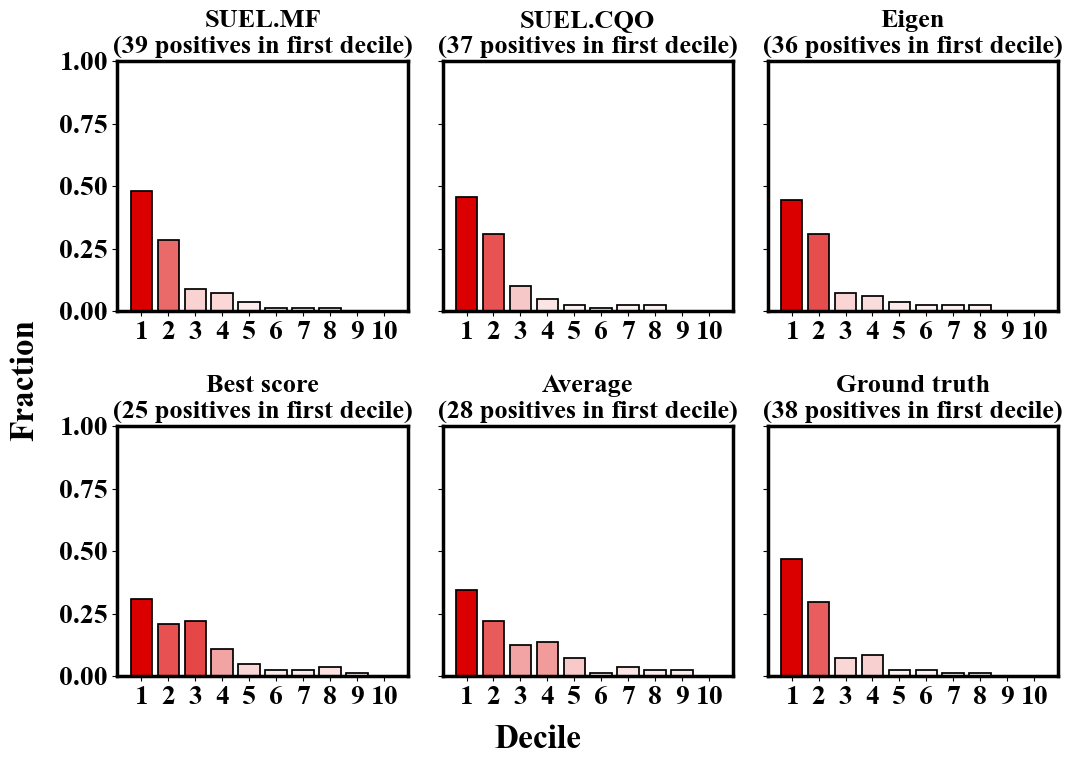

In [120]:
######### section 11
# The distribution of positive samples across different decile of prediction models
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mp
yy=np.array(yy)

ensemble_scores = [
    np.array(suel_mf),
    np.array(suel_cqo),
    np.array(eigen),
    np.array(best_score),
    np.array(average),
    np.array(ground_truth)
]

# Create subplots for each ensemble score
fig, axs = plt.subplots(2, 3, figsize=(11, 8), sharey=True)
font = {'family': 'Times New Roman', 'weight': 'bold', 'size': 20}
plt.rc('font', **font)

# List of labels for subplots
labels = ['SUEL.MF', 'SUEL.CQO', 'Eigen', 'Best score', 'Average',"Ground truth"]

# Iterate over each ensemble score and plot
for i, scores in enumerate(ensemble_scores):
    # Sort the scores and labels together
    inds = (-scores).argsort()
    sorted_gene = yy[inds]

    def divide(lst, n):
        p = len(lst) // n
        if len(lst)-p > 0:
            return [lst[:p]] + divide(lst[p:], n-1)
        else:
            return [lst]
    
    lst = sorted_gene
    b = divide(lst, 10)
    numbers = [sum(sublist) for sublist in b]
    overlap = np.sum(np.array(numbers))
    data = np.array(numbers) / np.sum(np.array(numbers))

    # Plotting each ensemble score in the corresponding subplot
    row = i // 3  # Determine the row index (0 or 1)
    col = i % 3   # Determine the column index (0, 1, or 2)
    ax = axs[row, col]  # Select the correct subplot

    # Colorize the graph based on likeability:
    likeability_scores = -np.array(data)
    data_normalizer = mp.colors.Normalize()
    color_map = mp.colors.LinearSegmentedColormap(
        "my_map",
        {'blue':   ((0.0, 0.0, 0.0), 
                     (1.0, 1,   1)),  # red ), # blue
         'green': ((0.0, 0.0, 0.0),
                   (1.0, 1, 1)),
         'red':  ((0.0, 0.86, 0.86),
                  (1.0, 1, 1))  # blue
        }
    )

    # Map xs to numbers:
    N = len(data)
    x_nums = np.arange(1, N+1)

    # Plot a bar graph:
    ax.bar(
        x_nums,
        data,
        align="center",
        color=color_map(data_normalizer(likeability_scores)),
        linewidth=1.25,
        ec="k"
    )
   
    ax.set_title(f'{labels[i]}\n({numbers[0]} positives in first decile)', loc='center', fontsize=19, fontweight='bold')
    ax.set_ylim((0, 1))
    ax.set_xticks(x_nums)

# Remove any extra subplots if there are fewer than 6 ensembles
if len(ensemble_scores) < 6:
    for i in range(len(ensemble_scores), 6):
        fig.delaxes(axs.flatten()[i])

# Set common labels for the whole figure
fig.text(0.5, 0.04, 'Decile', ha='center', fontsize=24, fontweight='bold')
fig.text(0.02, 0.5, 'Fraction', va='center', rotation='vertical', fontsize=24, fontweight='bold')

# Adjust layout to prevent clipping
plt.tight_layout(rect=[0.05, 0.05, 1, 1])

plt.show()
fig.savefig('4_latent_ASD_dist_fig.tiff', format='tiff', dpi=600, bbox_inches='tight')